# Plot collected radical data vs. GAV estimation

In [30]:
import string

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import pandas as pd

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from parameters import Ts

# Plot: compare radical data and GAV estimation

In [12]:
radical_data_df = pd.read_csv("../data/radical.csv")
radical_gav_df = pd.read_csv("../data/radical_gav.csv")

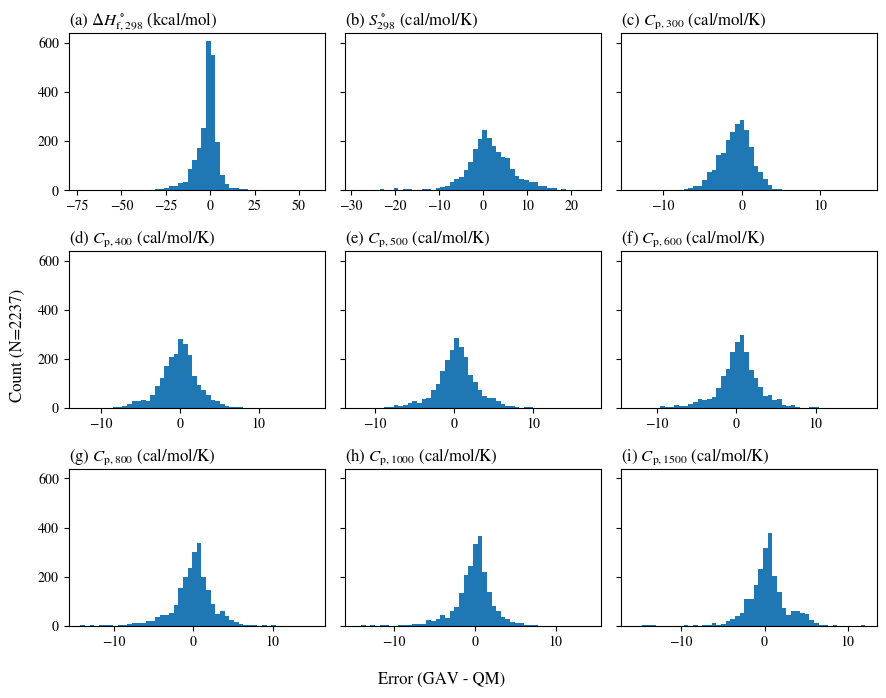

In [44]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
ax = axs.flat[0]
errors = radical_gav_df["H298 (kcal/mol)"] - radical_data_df["H298 (kcal/mol)"]
ax.hist(errors, bins=50)
ax.set_title("(a) $\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
errors = radical_gav_df["S298 (cal/mol/K)"] - radical_data_df["S298 (cal/mol/K)"]
ax.hist(errors, bins=50)
ax.set_title("(b) $S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    errors = radical_gav_df[f"Cp{T} (cal/mol/K)"] - radical_data_df[f"Cp{T} (cal/mol/K)"]
    ax.hist(errors, bins=50)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(radical_data_df.index)})")
fig.supxlabel(f"Error (GAV - QM)")

fig.tight_layout()
fig.savefig("figures/data_radical_gav_error_hist.pdf", bbox_inches="tight")

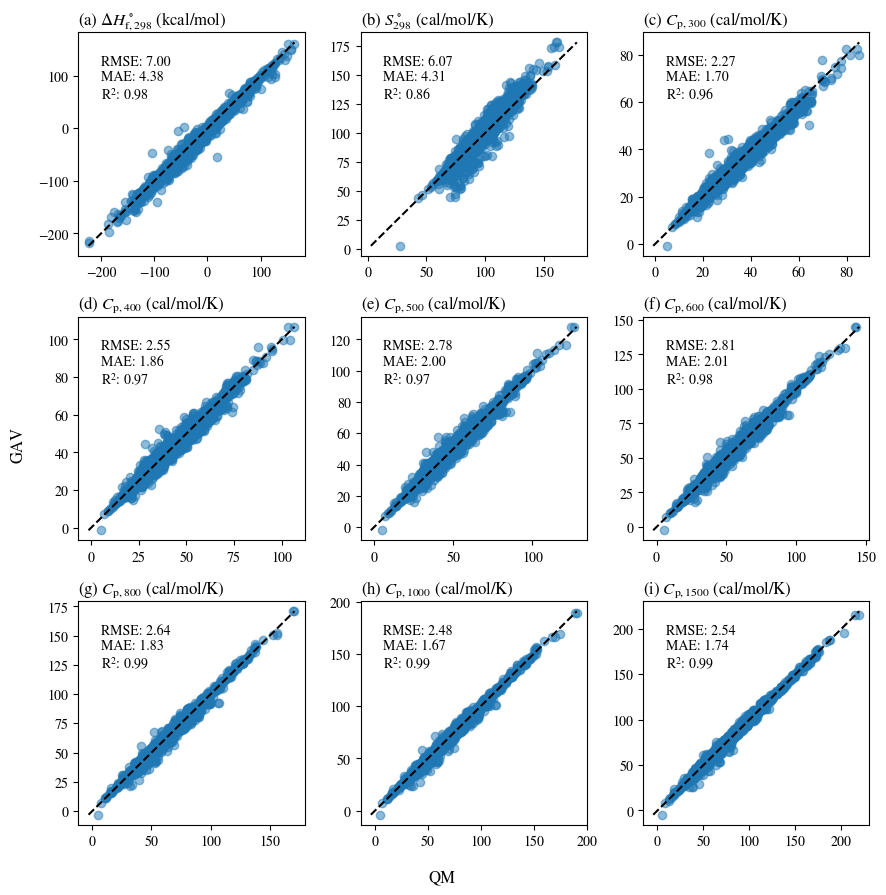

In [43]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = radical_data_df["H298 (kcal/mol)"]
pred_ys = radical_gav_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = radical_data_df["S298 (cal/mol/K)"]
pred_ys = radical_gav_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = radical_gav_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"GAV")
fig.supxlabel(f"QM")

fig.tight_layout()
fig.savefig("figures/data_radical_gav_qm_parity.pdf", bbox_inches="tight")